# Notes of studying pandas

*By: Haiyang Yu, 02/24/2018*


In [2]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('../src/utils/')
from configure import *
from mod_dataprep import *

In [16]:
a = pd.Series(np.linspace(0,2,6))
b = pd.Series(np.linspace(0,3,6))
#print(a, end='\n')
#print(b)
print(np.array(a) + np.array(b))
print(np.array(b) + a)

[0. 1. 2. 3. 4. 5.]
0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64


In [46]:
from datetime import datetime, timedelta

t0 = datetime(1992, 6, 22,hour=23,minute=59,second=58)
tnow = datetime.now()
print(tnow - t0)
print(t0 + timedelta(days=10000))

9385 days, 20:48:24.046633
2019-11-08 23:59:58


In [56]:
pd.datetime(1992, 6, 22) - datetime(1970,1,1)

datetime.timedelta(8208)

In [54]:
# 'D', 'M', 'W', 'Y', 'Q','H'
pd.date_range('2004-2-027', periods=8, freq='H')
# zero-time of computer: 1970.1.1:0

DatetimeIndex(['2004-02-27 00:00:00', '2004-02-27 01:00:00',
               '2004-02-27 02:00:00', '2004-02-27 03:00:00',
               '2004-02-27 04:00:00', '2004-02-27 05:00:00',
               '2004-02-27 06:00:00', '2004-02-27 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [55]:
pd.date_range('19950214', periods=3, freq='W')

DatetimeIndex(['1995-02-19', '1995-02-26', '1995-03-05'], dtype='datetime64[ns]', freq='W-SUN')

In [70]:
df = pd.DataFrame(np.random.normal(size=[4,3]), 
     index = pd.date_range('19990201', periods=4, freq='M'), 
     columns = list('ABC')
     )
df *= 2
df

,A,B,C
1999-02-28,-0.371632,-1.987476,2.934445
1999-03-31,0.892364,-0.912562,0.276832
1999-04-30,-3.554435,-3.029198,-0.663642
1999-05-31,-2.849938,0.565009,0.870581


In [80]:
#df.index
import pandas as pd
print(pd.DataFrame.abs( np.array(df) ))
print(df.abs())
print(df)

[[0.37163218 1.98747617 2.93444481]
 [0.89236411 0.91256184 0.27683197]
 [3.55443489 3.02919837 0.66364201]
 [2.84993761 0.56500857 0.8705809 ]]
                   A         B         C
1999-02-28  0.371632  1.987476  2.934445
1999-03-31  0.892364  0.912562  0.276832
1999-04-30  3.554435  3.029198  0.663642
1999-05-31  2.849938  0.565009  0.870581
                   A         B         C
1999-02-28 -0.371632 -1.987476  2.934445
1999-03-31  0.892364 -0.912562  0.276832
1999-04-30 -3.554435 -3.029198 -0.663642
1999-05-31 -2.849938  0.565009  0.870581


In [83]:
for i in df.columns.values:
    print(i)

A
B
C


In [95]:
a = { 'A': 1, \
    'B':range(8), 
    'C':list('xyzabced'), \
    'D':pd.datetime(1999,12,12), \
    'E':'s', 
    'F': pd.Categorical([1,2,2,3,1,1,2,3]), \
    'G':pd.date_range('20050815', periods=8, freq='M') }
print('D' in a.keys())
print(a.keys())
df = pd.DataFrame(a)
df

True
dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G'])


,A,B,C,D,E,F,G
0,1,0,x,1999-12-12,s,1,2005-08-31
1,1,1,y,1999-12-12,s,2,2005-09-30
2,1,2,z,1999-12-12,s,2,2005-10-31
3,1,3,a,1999-12-12,s,3,2005-11-30
4,1,4,b,1999-12-12,s,1,2005-12-31
5,1,5,c,1999-12-12,s,1,2006-01-31
6,1,6,e,1999-12-12,s,2,2006-02-28
7,1,7,d,1999-12-12,s,3,2006-03-31


In [97]:
df.dtypes

A             int64
B             int64
C            object
D    datetime64[ns]
E            object
F          category
G    datetime64[ns]
dtype: object

In [10]:
df.head(3)

,A,B,C,D,E,F,G
0,1,0,x,1999-12-12,s,1,2005-08-31
1,1,1,y,1999-12-12,s,2,2005-09-30
2,1,2,z,1999-12-12,s,2,2005-10-31


In [11]:
df.tail(3)

,A,B,C,D,E,F,G
5,1,5,c,1999-12-12,s,1,2006-01-31
6,1,6,e,1999-12-12,s,2,2006-02-28
7,1,7,d,1999-12-12,s,3,2006-03-31


In [107]:
df.index = df['B']
#df.loc[[1,2], ['C', 'G']]
df.iloc[0:2, 0:3]


,A,B,C
B,,,
0,1,0,x
1,1,1,y


In [105]:
df.index = df['F']
df.loc[[1,2], ['C', 'G']]

,C,G
F,,
1,x,2005-08-31
1,b,2005-12-31
1,c,2006-01-31
2,y,2005-09-30
2,z,2005-10-31
2,e,2006-02-28


In [13]:
df.values

array([[1, 0, 'x', Timestamp('1999-12-12 00:00:00'), 's', 1,
        Timestamp('2005-08-31 00:00:00')],
       [1, 1, 'y', Timestamp('1999-12-12 00:00:00'), 's', 2,
        Timestamp('2005-09-30 00:00:00')],
       [1, 2, 'z', Timestamp('1999-12-12 00:00:00'), 's', 2,
        Timestamp('2005-10-31 00:00:00')],
       [1, 3, 'a', Timestamp('1999-12-12 00:00:00'), 's', 3,
        Timestamp('2005-11-30 00:00:00')],
       [1, 4, 'b', Timestamp('1999-12-12 00:00:00'), 's', 1,
        Timestamp('2005-12-31 00:00:00')],
       [1, 5, 'c', Timestamp('1999-12-12 00:00:00'), 's', 1,
        Timestamp('2006-01-31 00:00:00')],
       [1, 6, 'e', Timestamp('1999-12-12 00:00:00'), 's', 2,
        Timestamp('2006-02-28 00:00:00')],
       [1, 7, 'd', Timestamp('1999-12-12 00:00:00'), 's', 3,
        Timestamp('2006-03-31 00:00:00')]], dtype=object)

In [108]:
df.describe()

,A,B
count,8.0,8.00000
mean,1.0,3.50000
std,0.0,2.44949
min,1.0,0.00000
25%,1.0,1.75000
50%,1.0,3.50000
75%,1.0,5.25000
max,1.0,7.00000


In [109]:
df.T

B,0,1,2,3,4,5,6,7
A,1,1,1,1,1,1,1,1
B,0,1,2,3,4,5,6,7
C,x,y,z,a,b,c,e,d
D,1999-12-12 00:00:00,1999-12-12 00:00:00,1999-12-12 00:00:00,1999-12-12 00:00:00,1999-12-12 00:00:00,1999-12-12 00:00:00,1999-12-12 00:00:00,1999-12-12 00:00:00
E,s,s,s,s,s,s,s,s
F,1,2,2,3,1,1,2,3
G,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00


In [112]:
df.index = df['F']
df.sort_index(axis=0, ascending=False)

,A,B,C,D,E,F,G
F,,,,,,,
3,1,7,d,1999-12-12,s,3,2006-03-31
3,1,3,a,1999-12-12,s,3,2005-11-30
2,1,6,e,1999-12-12,s,2,2006-02-28
2,1,2,z,1999-12-12,s,2,2005-10-31
2,1,1,y,1999-12-12,s,2,2005-09-30
1,1,5,c,1999-12-12,s,1,2006-01-31
1,1,4,b,1999-12-12,s,1,2005-12-31
1,1,0,x,1999-12-12,s,1,2005-08-31


In [113]:
df.sort_index(axis=1, ascending=False)

,G,F,E,D,C,B,A
F,,,,,,,
1,2005-08-31,1,s,1999-12-12,x,0,1
2,2005-09-30,2,s,1999-12-12,y,1,1
2,2005-10-31,2,s,1999-12-12,z,2,1
3,2005-11-30,3,s,1999-12-12,a,3,1
1,2005-12-31,1,s,1999-12-12,b,4,1
1,2006-01-31,1,s,1999-12-12,c,5,1
2,2006-02-28,2,s,1999-12-12,e,6,1
3,2006-03-31,3,s,1999-12-12,d,7,1


In [120]:
df.index = df['B']
df.sort_values(by=['F','G'], ascending=[False, True] )

,A,B,C,D,E,F,G
B,,,,,,,
3,1,3,a,1999-12-12,s,3,2005-11-30
7,1,7,d,1999-12-12,s,3,2006-03-31
1,1,1,y,1999-12-12,s,2,2005-09-30
2,1,2,z,1999-12-12,s,2,2005-10-31
6,1,6,e,1999-12-12,s,2,2006-02-28
0,1,0,x,1999-12-12,s,1,2005-08-31
4,1,4,b,1999-12-12,s,1,2005-12-31
5,1,5,c,1999-12-12,s,1,2006-01-31


In [121]:
df.index = df['G']
df

,A,B,C,D,E,F,G
G,,,,,,,
2005-08-31,1,0,x,1999-12-12,s,1,2005-08-31
2005-09-30,1,1,y,1999-12-12,s,2,2005-09-30
2005-10-31,1,2,z,1999-12-12,s,2,2005-10-31
2005-11-30,1,3,a,1999-12-12,s,3,2005-11-30
2005-12-31,1,4,b,1999-12-12,s,1,2005-12-31
2006-01-31,1,5,c,1999-12-12,s,1,2006-01-31
2006-02-28,1,6,e,1999-12-12,s,2,2006-02-28
2006-03-31,1,7,d,1999-12-12,s,3,2006-03-31


In [122]:
df['20051201':'20060301']

,A,B,C,D,E,F,G
G,,,,,,,
2005-12-31,1,4,b,1999-12-12,s,1,2005-12-31
2006-01-31,1,5,c,1999-12-12,s,1,2006-01-31
2006-02-28,1,6,e,1999-12-12,s,2,2006-02-28


In [131]:
df.index = df['G']
df.loc['10/1/2005':'12/31/2005', :]

,A,B,C,D,E,F,G
G,,,,,,,
2005-10-31,1,2,z,1999-12-12,s,2,2005-10-31
2005-11-30,1,3,a,1999-12-12,s,3,2005-11-30
2005-12-31,1,4,b,1999-12-12,s,1,2005-12-31


In [132]:
df.loc['20051101':'20060201', ['B','C','F']]

,B,C,F
G,,,
2005-11-30,3,a,3
2005-12-31,4,b,1
2006-01-31,5,c,1


In [133]:
df.iloc[3:5, 2:4]

,C,D
G,,
2005-11-30,a,1999-12-12
2005-12-31,b,1999-12-12


In [134]:
df.iat[3,4]

's'

In [136]:
df[df.index > '20051201']

,A,B,C,D,E,F,G
G,,,,,,,
2005-12-31,1,4,b,1999-12-12,s,1,2005-12-31
2006-01-31,1,5,c,1999-12-12,s,1,2006-01-31
2006-02-28,1,6,e,1999-12-12,s,2,2006-02-28
2006-03-31,1,7,d,1999-12-12,s,3,2006-03-31


In [143]:
df[(df['F'] == 1) | (df['G'] > '20050901')]

,A,B,C,D,E,F,G
G,,,,,,,
2005-08-31,1,0,x,1999-12-12,s,1,2005-08-31
2005-09-30,1,1,y,1999-12-12,s,2,2005-09-30
2005-10-31,1,2,z,1999-12-12,s,2,2005-10-31
2005-11-30,1,3,a,1999-12-12,s,3,2005-11-30
2005-12-31,1,4,b,1999-12-12,s,1,2005-12-31
2006-01-31,1,5,c,1999-12-12,s,1,2006-01-31
2006-02-28,1,6,e,1999-12-12,s,2,2006-02-28
2006-03-31,1,7,d,1999-12-12,s,3,2006-03-31


In [27]:
df[ df['F'].isin([2,3]) ]

,A,B,C,D,E,F,G
G,,,,,,,
2005-09-30,1,1,y,1999-12-12,s,2,2005-09-30
2005-10-31,1,2,z,1999-12-12,s,2,2005-10-31
2005-11-30,1,3,a,1999-12-12,s,3,2005-11-30
2006-02-28,1,6,e,1999-12-12,s,2,2006-02-28
2006-03-31,1,7,d,1999-12-12,s,3,2006-03-31


In [45]:
df = pd.DataFrame(np.random.uniform(size=[8,3]), columns=['A','B','C'])
df[df < 0.2] = np.nan
df

,A,B,C
0,0.481181,NaN,NaN
1,0.552709,0.891165,0.366345
2,0.608747,0.971134,NaN
3,0.508067,0.727928,0.322527
4,0.545711,NaN,0.971110
5,NaN,0.384004,0.447015
6,NaN,0.855340,0.294512
7,0.763702,0.934555,0.781717


In [46]:
df.dropna(how='any')

,A,B,C
1,0.552709,0.891165,0.366345
3,0.508067,0.727928,0.322527
7,0.763702,0.934555,0.781717


In [54]:
df.fillna(-999)

,A,B,C
0,0.481181,-999.000000,-999.000000
1,0.552709,0.891165,0.366345
2,0.608747,0.971134,-999.000000
3,0.508067,0.727928,0.322527
4,0.545711,-999.000000,0.971110
5,-999.000000,0.384004,0.447015
6,-999.000000,0.855340,0.294512
7,0.763702,0.934555,0.781717


In [55]:
df.isna()

,A,B,C
0,False,True,True
1,False,False,False
2,False,False,True
3,False,False,False
4,False,True,False
5,True,False,False
6,True,False,False
7,False,False,False


In [57]:
df.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,0.576686,0.794021,0.530538
std,0.101358,0.217623,0.279323
min,0.481181,0.384004,0.294512
25%,0.517478,0.759781,0.333481
50%,0.549210,0.873253,0.406680
75%,0.594737,0.923708,0.698042
max,0.763702,0.971134,0.971110


In [62]:
df.mean(axis=0)

A    0.576686
B    0.794021
C    0.530538
dtype: float64

In [67]:
df.mean(axis=1)

0    0.481181
1    0.603406
2    0.789940
3    0.519507
4    0.758411
5    0.415509
6    0.574926
7    0.826658
dtype: float64

In [77]:
df.A.shift(1)

0         NaN
1    0.481181
2    0.552709
3    0.608747
4    0.508067
5    0.545711
6         NaN
7         NaN
Name: A, dtype: float64

In [95]:
df.apply(np.cumsum)

,A,B,C
0,0.481181,NaN,NaN
1,1.033889,0.891165,0.366345
2,1.642636,1.862300,NaN
3,2.150703,2.590228,0.688872
4,2.696414,NaN,1.659982
5,NaN,2.974232,2.106997
6,NaN,3.829572,2.401509
7,3.460115,4.764127,3.183227


In [97]:
df.apply(lambda x: x.max() - x.min() )

A    0.282521
B    0.587131
C    0.676598
dtype: float64

In [104]:
s = pd.Series( np.random.normal(size=100).astype(int) )
s.value_counts()

 0    72
 1    13
-1    12
 2     2
-2     1
dtype: int64

In [107]:
s = pd.Series(['A', 'B', 2, 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2     NaN
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [108]:
s.str.upper()

0       A
1       B
2     NaN
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [113]:
df1 = pd.DataFrame(np.random.randn(2, 3))
df1

,0,1,2
0,0.453908,0.096564,-0.732505
1,0.350880,0.848214,1.703342


In [118]:
df2 = pd.DataFrame(np.random.randn(3, 4))
df2

,0,1,2,3
0,-1.730376,-0.606262,-0.487149,-1.345862
1,0.354186,-1.400982,-1.575134,0.387678
2,0.304772,0.991484,1.901440,-0.469892


In [121]:
df = pd.concat([df1, df2])
df

,0,1,2,3
0,0.453908,0.096564,-0.732505,NaN
1,0.350880,0.848214,1.703342,NaN
0,-1.730376,-0.606262,-0.487149,-1.345862
1,0.354186,-1.400982,-1.575134,0.387678
2,0.304772,0.991484,1.901440,-0.469892


In [130]:
df.loc[0,:]

,0,1,2,3
0,0.453908,0.096564,-0.732505,NaN
0,-1.730376,-0.606262,-0.487149,-1.345862


In [131]:
df.loc[2,:]

0    0.304772
1    0.991484
2    1.901440
3   -0.469892
Name: 2, dtype: float64

In [157]:
dates = {'date': pd.date_range('19991201', periods=2)}
data  = {'A': np.random.randn(2), 'B': np.random.randn(2) } 
df1 = pd.DataFrame({**dates, **data})
df1.index = df1.date
df1

,A,B,date
date,,,
1999-12-01,0.362343,0.595188,1999-12-01
1999-12-02,-1.233154,1.273178,1999-12-02


In [160]:
dates = {'date': pd.date_range('19991202', periods=3)}
data  = {'C': np.random.randn(3)} 
df2 = pd.DataFrame({**dates, **data})
#df2.index = df2.date
df2

,C,date
0,-0.568735,1999-12-02
1,0.216748,1999-12-03
2,-0.468444,1999-12-04


In [159]:
pd.merge(df1, df2)

,A,B,date,C
0,-1.233154,1.273178,1999-12-02,-0.658859


In [176]:
df1.append( {'A':'string', 'D':2.5}, ignore_index=True )

,A,B,date,D
0,0.362343,0.595188,1999-12-01,NaN
1,-1.23315,1.273178,1999-12-02,NaN
2,string,NaN,NaT,2.5


In [187]:
ppinfo = {'name': list('ABCDEF'), 
         'gender': ['male','female','female','male','male','female'], 
         'height': [6.5, 6.0, 5.5, 7.0, 7.5, 6.5], 
         'weight': [200, 100, 120, 180, 150, 140], 
         'hair': ['red', 'red', 'black', 'red', 'black', 'black'] }

df = pd.DataFrame(ppinfo)
df

,gender,hair,height,name,weight
0,male,red,6.5,A,200
1,female,red,6.0,B,100
2,female,black,5.5,C,120
3,male,red,7.0,D,180
4,male,black,7.5,E,150
5,female,black,6.5,F,140


In [188]:
df.groupby('gender').mean()

,height,weight
gender,,
female,6.0,120.000000
male,7.0,176.666667


In [189]:
df.groupby('gender').std()

,height,weight
gender,,
female,0.5,20.000000
male,0.5,25.166115


In [190]:
df.groupby('gender').max()

,hair,height,name,weight
gender,,,,
female,red,6.5,F,140
male,red,7.5,E,200


In [200]:
pd.pivot_table(df, index=['gender', 'hair'])

height  weight
gender hair                 
female black    6.00     130
       red      6.00     100
male   black    7.50     150
       red      6.75     190

In [204]:
pd.pivot_table(df, values=['height', 'weight'], index=['gender'], columns=['hair'])

height       weight     
hair    black   red  black  red
gender                         
female    6.0  6.00    130  100
male      7.5  6.75    150  190

In [267]:
# 'S', 'Min', 'H', 'D', 'M', 'Y', 'Q'
pd.date_range('1/1/2012', periods=10, freq='Q')


DatetimeIndex(['2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [240]:
time = pd.date_range('3/6/2012 00:00', periods=5, freq='30Min')
ts = pd.Series(np.random.randn(len(ts)), index=time)
ts

2012-03-06 00:00:00   -0.187632
2012-03-06 00:30:00   -2.130510
2012-03-06 01:00:00    1.769560
2012-03-06 01:30:00   -0.388904
2012-03-06 02:00:00    0.702074
Freq: 30T, dtype: float64

In [245]:
tutc = ts.tz_localize('UTC')
tutc

2012-03-06 00:00:00+00:00   -0.187632
2012-03-06 00:30:00+00:00   -2.130510
2012-03-06 01:00:00+00:00    1.769560
2012-03-06 01:30:00+00:00   -0.388904
2012-03-06 02:00:00+00:00    0.702074
Freq: 30T, dtype: float64

In [248]:
tutc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.187632
2012-03-05 19:30:00-05:00   -2.130510
2012-03-05 20:00:00-05:00    1.769560
2012-03-05 20:30:00-05:00   -0.388904
2012-03-05 21:00:00-05:00    0.702074
Freq: 30T, dtype: float64

In [252]:
ts = pd.date_range('1/1/2012', periods=5, freq='M')
ts

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [255]:
tp = ts.to_period()
tp

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05'], dtype='period[M]', freq='M')

In [256]:
tp.to_timestamp()

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [259]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [268]:
(prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9


PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [271]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['A', 'B', 'B', 'A', 'A', 'F']})
df

,id,raw_grade
0,1,A
1,2,B
2,3,B
3,4,A
4,5,A
5,6,F


In [275]:
df['GPA'] = df["raw_grade"].astype("category")
df['GPA'].cat.categories = [4.0, 3.0, 2.0]
df

,id,raw_grade,GPA
0,1,A,4.0
1,2,B,3.0
2,3,B,3.0
3,4,A,4.0
4,5,A,4.0
5,6,F,2.0


In [277]:
df.sort_values(by='GPA', ascending=False)

,id,raw_grade,GPA
5,6,F,2.0
2,3,B,3.0
1,2,B,3.0
4,5,A,4.0
3,4,A,4.0
0,1,A,4.0


In [285]:
df.groupby(['GPA']).size()

GPA
4.0    3
3.0    2
2.0    1
dtype: int64

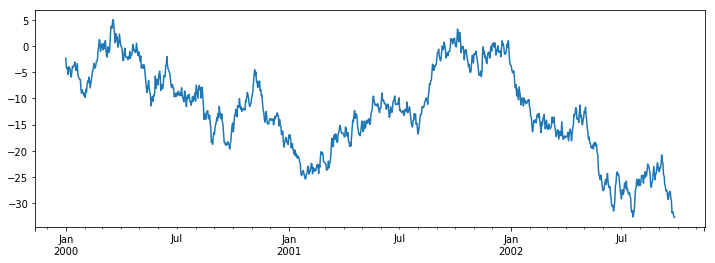

In [288]:
ts = pd.Series(np.cumsum( np.random.randn(1000) ), index=pd.date_range('1/1/2000', periods=1000))
plt.figure(1, figsize=(12,4))
ts.plot()


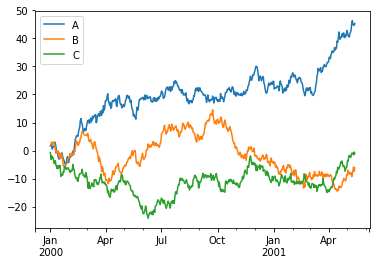

In [323]:
df = pd.DataFrame(np.cumsum(np.random.randn(500,3), axis=0), columns=list('ABC'), 
                 index=pd.date_range('01/01/2000', periods=500) )

df.plot()
plt.legend(loc='best')
plt.show()

## Example of tax rates

In [52]:
df = pd.read_csv('taxlevels.csv')
df.head(10)

,Year,Tax Rate,Single,Married/Joint & Widow(er),Married/Separate,Head of Household
0,2018,10%,"$1 to $9,525","$1 to $19,050","$1 to $9,525","$1 to $13,600"
1,2018,12%,"$9,526 to $38,700","$19,051 to $77,400","$9,526 to $38,700","$13,601 to $51,800"
2,2018,22%,"$38,701 to $82,500","$77,401 to $165,000","$38,701 to $82,500","$51,801 to $82,500"
3,2018,24%,"$82,501 to $157,500","$165,001 to $315,000","$82,501 to $157,500","$82,501 to $157,500"
4,2018,32%,"$157,501 to $200,000","$315,001 to $400,000","$157,501 to $200,000","$157,500 to $200,000"
5,2018,35%,"$200,001 to $500,000","$400,001 to $600,000","$200,001 to $300,000","$200,001 to $500,000"
6,2018,37%,"over $500,000","over $600,000","over $300,000","over $500,000"
7,2017,10%,"$1 to $9,325","$1 to $18,650","$1 to $9,325","$1 to $13,350"
8,2017,15%,"$9,326 to $37,950","$18,651 to $75,900","$9,326 to $37,950","$13,351 to $50,800"
9,2017,25%,"$37,951 to $91,900","$75,901 to $153,100","$37,951 to $76,550","$50,801 to $131,200"


In [53]:
def levelstr2num(s):
    s = s.replace(',', '')    
    if s.count('$') == 1:
        i = s.index('$')
        n = int(s[i+1:])
    if s.count('$') == 2:
        i = s.index('$')
        j = s.index(' ')
        n = int(s[i+1:j])-1
    return n

def ratestr2num(s):
    return float(s[:-1])

for i in range(len(df)):
    df.loc[i, 'Tax Rate'] = ratestr2num(df.loc[i, 'Tax Rate'])
    for c in ['Single', 'Married/Joint & Widow(er)', 'Married/Separate', 'Head of Household']:
        df.loc[i, c] = levelstr2num(df.loc[i, c])

df.head(10)

,Year,Tax Rate,Single,Married/Joint & Widow(er),Married/Separate,Head of Household
0,2018,10,0,0,0,0
1,2018,12,9525,19050,9525,13600
2,2018,22,38700,77400,38700,51800
3,2018,24,82500,165000,82500,82500
4,2018,32,157500,315000,157500,157499
5,2018,35,200000,400000,200000,200000
6,2018,37,500000,600000,300000,500000
7,2017,10,0,0,0,0
8,2017,15,9325,18650,9325,13350
9,2017,25,37950,75900,37950,50800


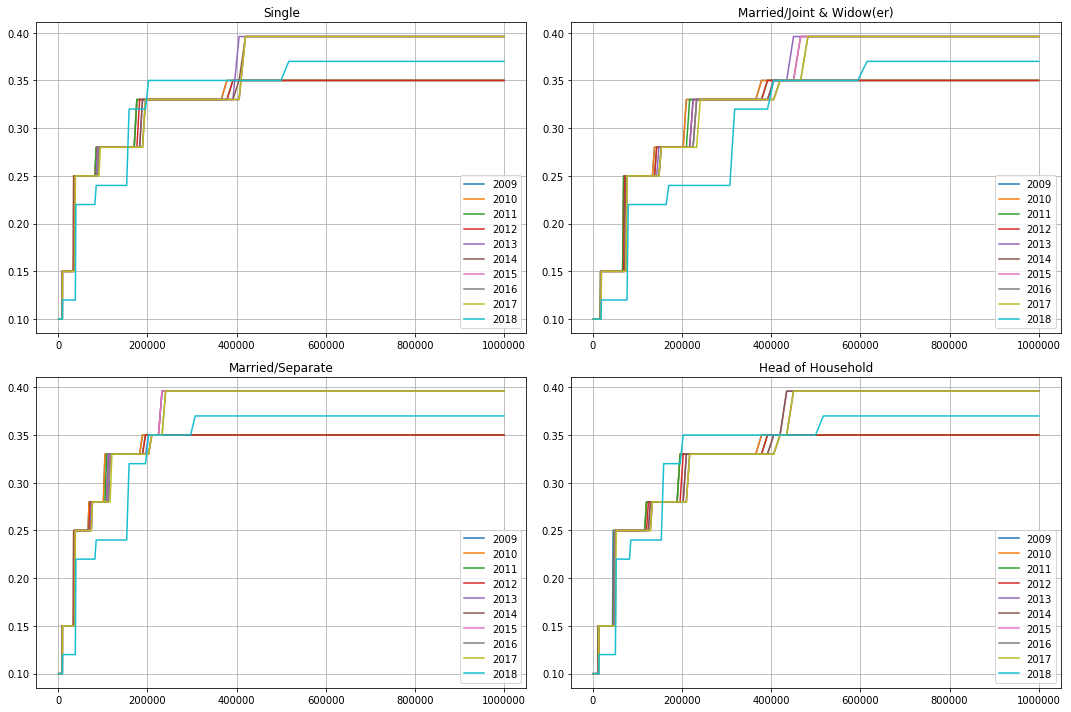

In [178]:
def get_taxrate(table, year=2018, income=100000, status='Single'):
    subtable = table[ table['Year']==year][['Tax Rate', status]]
    subtable.index = range(len(subtable))
    tmp = subtable.loc[:, status].astype(int) - int(income)
    tmp[tmp<0] = 0
    if income<=0:
        r = 0
    else:
        im = list(tmp).count(0)
        if int(income) == subtable.loc[im-1, status]: 
            im -= 1
        r = subtable.loc[im-1, 'Tax Rate'] / 100.0
    return r

plt.figure(1, figsize=(15,10))
status = ['Single', 'Married/Joint & Widow(er)', 'Married/Separate', 'Head of Household']
years = range(2009, 2019)
incomes = 10 ** np.linspace(3, 6, 200)
for icase in range(4):
    plt.subplot(2,2,icase+1)
    for y in years:
        rates = [get_taxrate(df, year=y, income=i, status=status[icase]) for i in incomes]
        plt.plot(incomes, rates)
    plt.grid(True)
    plt.legend(years, loc='best')
    plt.title(status[icase])

plt.tight_layout()

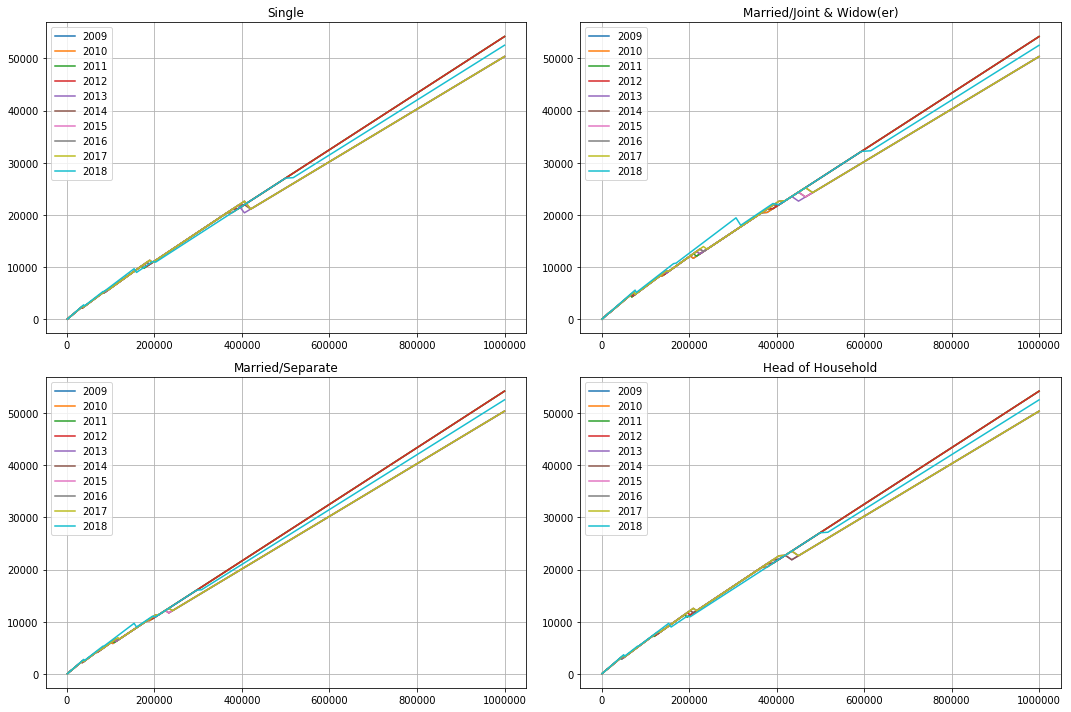

In [182]:
plt.figure(1, figsize=(15,10))
status = ['Single', 'Married/Joint & Widow(er)', 'Married/Separate', 'Head of Household']
years = range(2009,2019)
incomes = 10 ** np.linspace(3, 6, 200)
for icase in range(4):
    plt.subplot(2,2,icase+1)
    for y in years:
        mp = [(i-i*get_taxrate(df, year=y, income=i, status=status[icase]))/12  for i in incomes]
        plt.plot(incomes, mp)
    plt.grid(True)
    plt.legend(years, loc='best')
    plt.title(status[icase])

plt.tight_layout()

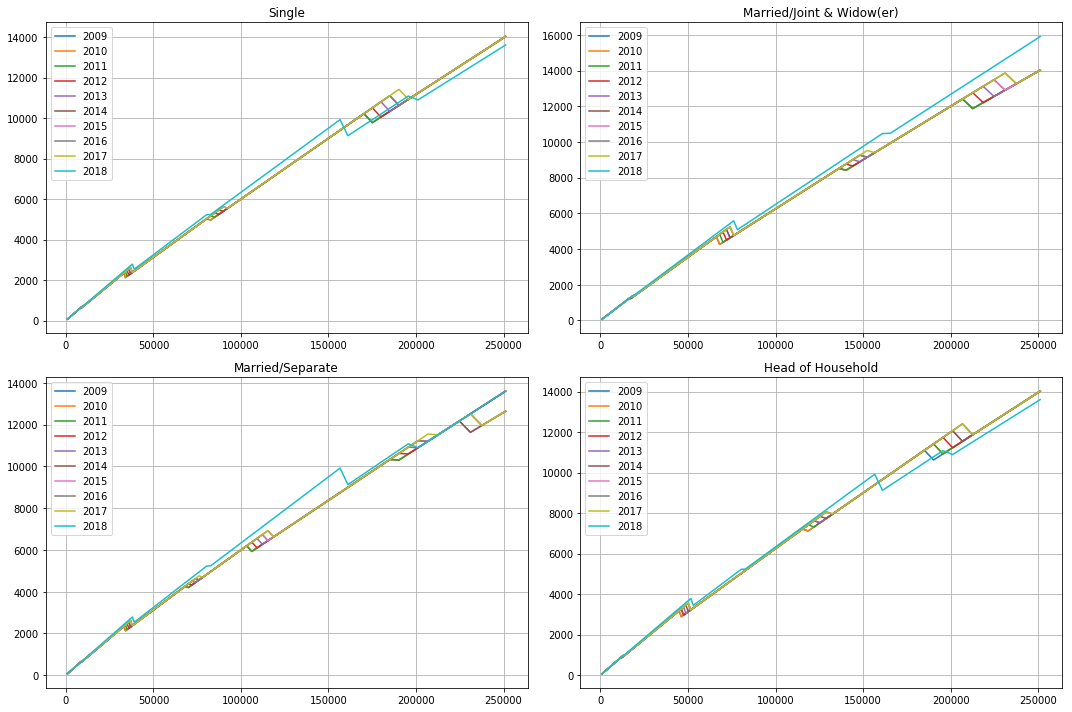

In [183]:
plt.figure(1, figsize=(15,10))
status = ['Single', 'Married/Joint & Widow(er)', 'Married/Separate', 'Head of Household']
years = range(2009,2019)
incomes = 10 ** np.linspace(3, 5.4, 200)
for icase in range(4):
    plt.subplot(2,2,icase+1)
    for y in years:
        mp = [(i-i*get_taxrate(df, year=y, income=i, status=status[icase]))/12  for i in incomes]
        plt.plot(incomes, mp)
    plt.grid(True)
    plt.legend(years, loc='best')
    plt.title(status[icase])

plt.tight_layout()